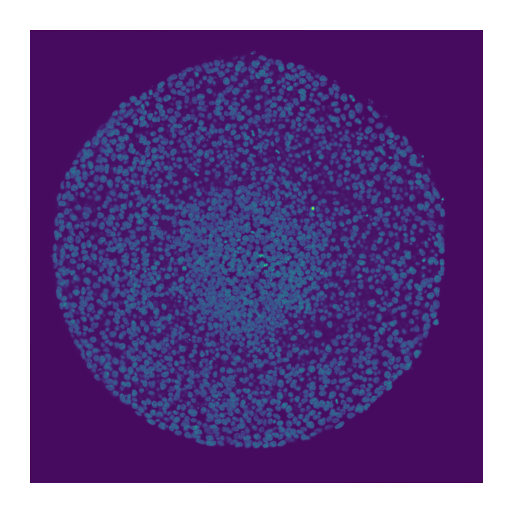

In [10]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, models, plot
from pathlib import Path

# REPLACE FILES WITH YOUR IMAGE PATHS
dataDir = Path("Y:/Seth/210202_ESI_MP_42_E6TFgibco_E6TF/zslices/")
pattern = '210202_ESI_MP_42_E6TFgibco_E6TF_2_p0000_w0000_z%.4d.tif'
nzslices = 5; #number of z slices
files = []
for ii in range(1,6):
    name = pattern % (ii-1)
    filename = dataDir / name
    files.append(filename)

# view 1 image
img = io.imread(files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

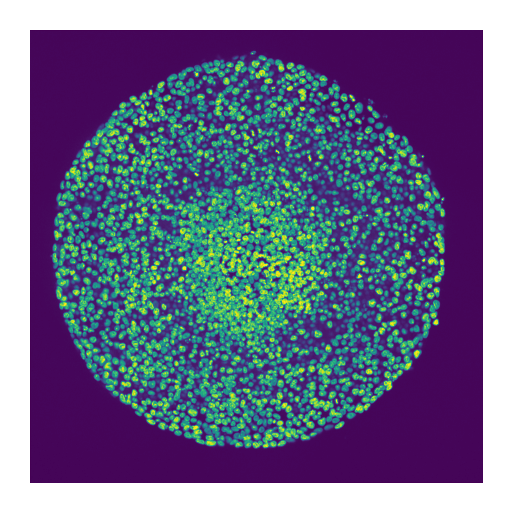

In [11]:
#display image with rescaled + saturated intensity
from skimage import exposure
p1, p99 = np.percentile(img, (1, 99))
J = exposure.rescale_intensity(img, in_range=(p1, p99))

plt.figure(figsize=(2,2))
plt.imshow(J)
plt.axis('off')
plt.show()

In [3]:
#run the model once
#if you set diameter=None in the call to model.eval, it will run the model once to estimate the size of nuclei and run again
#to do actual segmentation but this is slow and works less well on the micropattern than on sparser disordered cells
#I generally estimate in Fiji instead; for 40x, nuclear diameter generally ranges from ~25-70 pixels
model = models.Cellpose(gpu=True, model_type='nuclei')
chan = [0,0] #use chan = [0,0] for nuclear segmentation only
img = io.imread(files[0])
p1, p99 = np.percentile(img, (1, 99))
J = exposure.rescale_intensity(img, in_range=(p1, p99))
masks, flows, styles, diams = model.eval(img, diameter=35, channels=chan, net_avg=True)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)


C:\Users\teaguest\Anaconda3\envs\cellpose\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


time spent: running network 3.32s; flow+mask computation 14.07
estimated masks for 1 image(s) in 17.61 sec
>>>> TOTAL TIME 17.61 sec


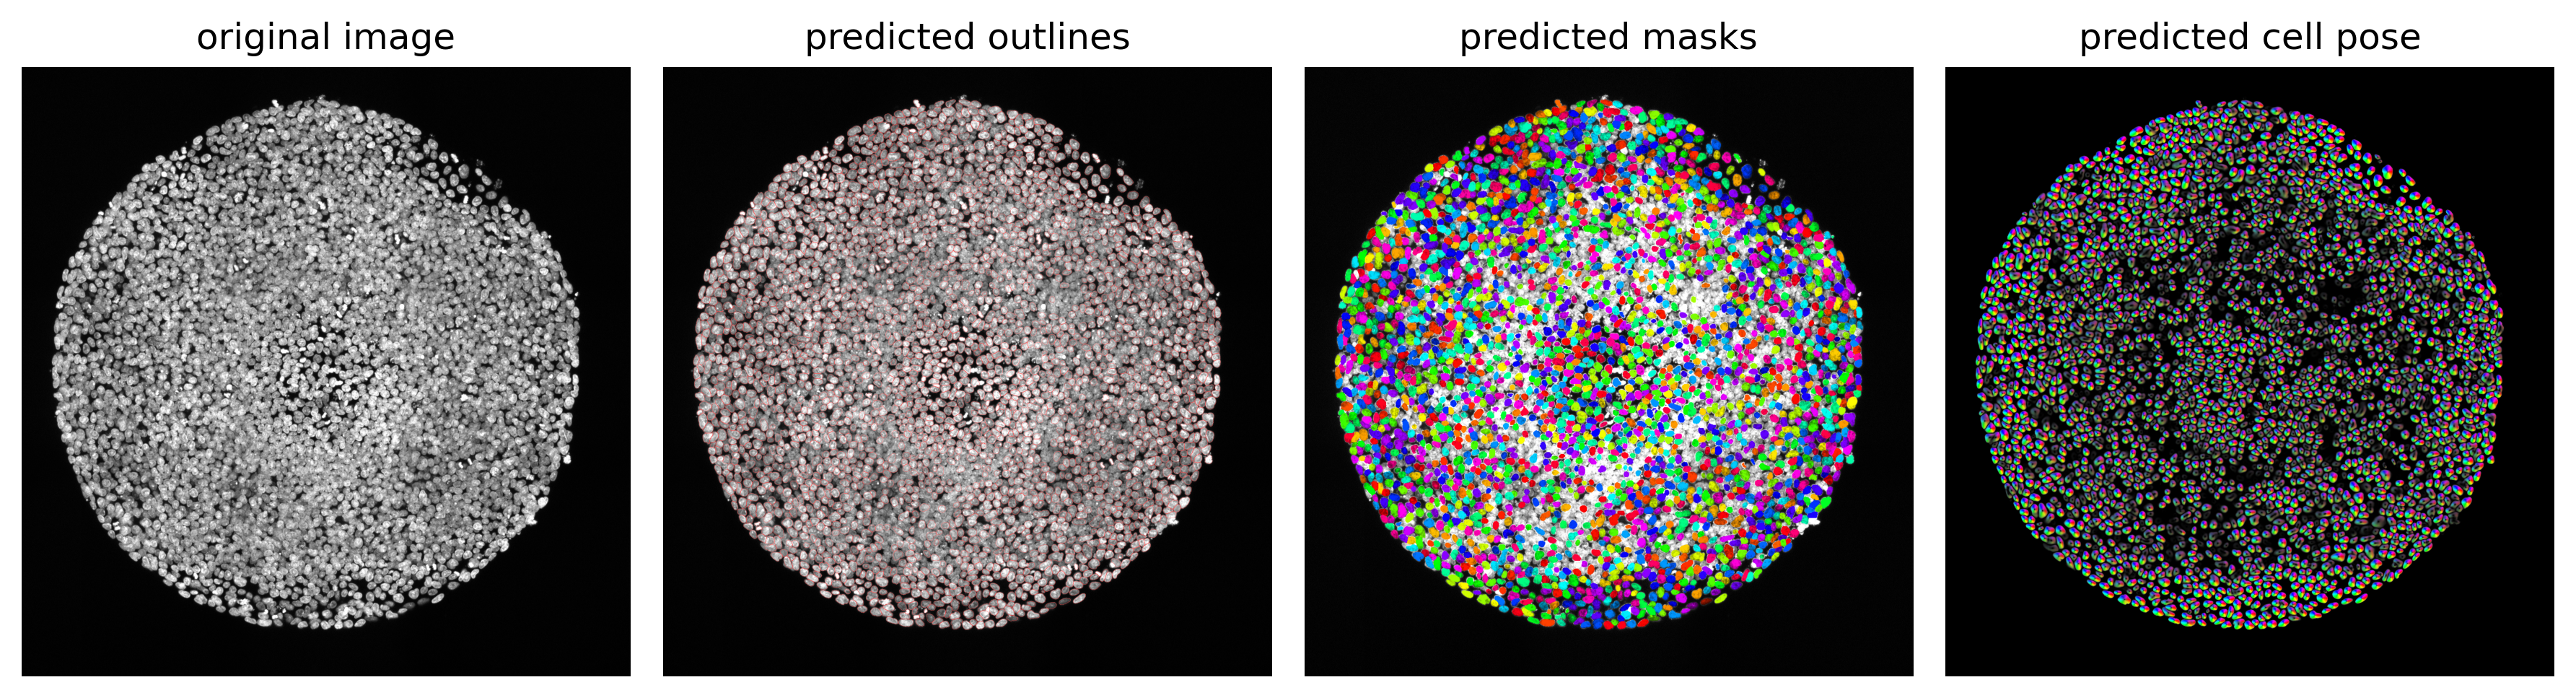

In [4]:
# DISPLAY RESULTS
#The built-in way of doing this is extremely slow, I've been saving results and visualizing in matlab instead
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [13]:
# RUN CELLPOSE

#from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='nuclei')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[0,0]]
chan = [0,0]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
#for chan, filename in zip(channels, files):
for filename in files:
    img = io.imread(filename)
    J = exposure.rescale_intensity(img, in_range=(p1, p99))
    masks, flows, styles, diams = model.eval(img, diameter=35, channels=chan, net_avg=True)
    # save results as png
    #io.save_to_png(img, masks, flows, filename)
    base = os.path.splitext(filename)[0]
    masks = masks.astype(np.uint16) if masks.max()<2**16-1 else masks.astype(np.uint32)
    io.imsave(base + '_cp_masks.png', masks)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
time spent: running network 1.75s; flow+mask computation 14.71
estimated masks for 1 image(s) in 16.71 sec
>>>> TOTAL TIME 16.71 sec
processing 1 image(s)
time spent: running network 1.68s; flow+mask computation 16.48
estimated masks for 1 image(s) in 18.40 sec
>>>> TOTAL TIME 18.40 sec
processing 1 image(s)
time spent: running network 1.71s; flow+mask computation 14.78
estimated masks for 1 image(s) in 16.76 sec
>>>> TOTAL TIME 16.76 sec
processing 1 image(s)
time spent: running network 1.74s; flow+mask computation 12.75
estimated masks for 1 image(s) in 14.69 sec
>>>> TOTAL TIME 14.69 sec
processing 1 image(s)
time spent: running network 1.72s; flow+mask computation 9.51
estimated masks for 1 image(s) in 11.47 sec
>>>> TOTAL TIME 11.47 sec
